In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense

In [2]:
df=pd.read_csv('imdb.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
texts=df['review'].astype(str).tolist()
labels=df['sentiment'].tolist()

In [6]:
t=Tokenizer(num_words=10000,  oov_token='<OOV>')
t.fit_on_texts(texts)
sequences=t.texts_to_sequences(texts)
pad=pad_sequences(sequences,maxlen=256)

In [7]:
x=np.array(pad)
y=np.array(labels)

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=Sequential([
    Embedding(input_dim=10000,output_dim=32),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.6806 - loss: 0.5387 - val_accuracy: 0.8717 - val_loss: 0.2995
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9558 - loss: 0.1272 - val_accuracy: 0.8646 - val_loss: 0.3684
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9932 - loss: 0.0270 - val_accuracy: 0.8594 - val_loss: 0.5700
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.8559 - val_loss: 0.6880
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.8595 - val_loss: 0.8203


In [12]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8668 - loss: 0.7409


[0.7709762454032898, 0.8644000291824341]

In [16]:
newr=["It is amazing"]
seq=t.texts_to_sequences(newr)
padd=pad_sequences(seq,maxlen=256)
pred=model.predict(padd)[0][0]
if pred>0.5:
    print('positive')
else:
    print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
positive


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[4297  664]
 [ 692 4347]]


<Axes: >

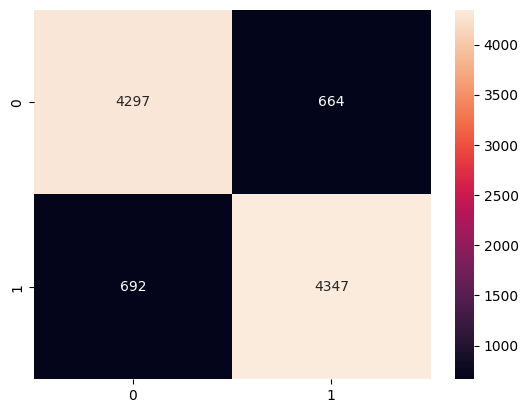

In [18]:
ypred=model.predict(xtest)
ypred=(ypred>0.5).astype('int32')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

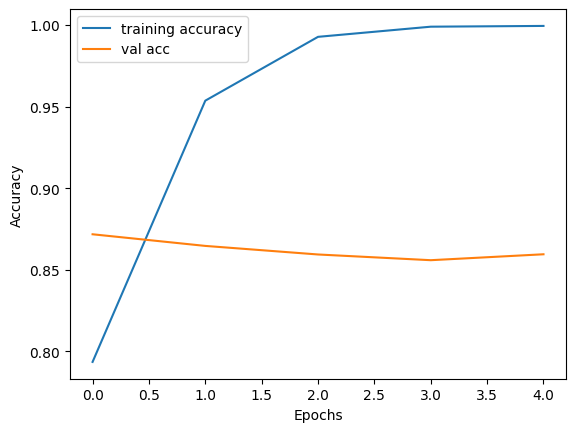

In [24]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

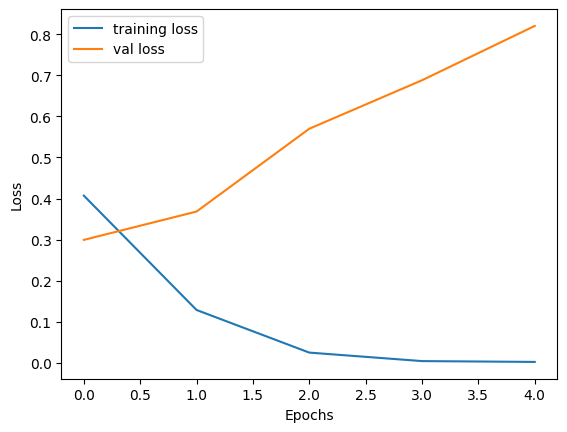

In [25]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()